## CPU Part

### Test single matrix multiplication on CPU

In [5]:
import numpy as np
import time

test_set = [1, 10, 100, 1000]
np_single_y = []
for d in test_set:

    N = 100
    if d <= 100:
        N = 10000

    print("\nNumpy output with quantity of {}:".format(d))
    t = 0
    for _ in range(N):
        x = np.random.rand(3*d, 3*d)
        y = np.random.rand(3*d, 3*d)
        start = time.time()
        ori_output = np.matmul(x, y)
        t += (time.time()-start)
    print("execution time {}s".format(t/N))
    np_single_y.append(t/N)


Numpy output with quantity of 1:
execution time 2.5214672088623045e-06s

Numpy output with quantity of 10:
execution time 6.5701007843017575e-06s

Numpy output with quantity of 100:
execution time 0.0024542291402816774s

Numpy output with quantity of 1000:
execution time 1.6850742483139038s


In [6]:
import torch
import time

# Define a simple function for matrix multiplication
def pt_matmul_fn(x, y):
    return torch.matmul(x, y)

# Convert the function into a TorchScript static graph using torch.jit.script
@torch.jit.script
def pt_matmul_script(x: torch.Tensor, y: torch.Tensor) -> torch.Tensor:
    return torch.matmul(x, y)

test_set = [1, 10, 100, 1000]
pt_e_single_y = []
pt_s_single_y = []
for d in test_set:

    N = 100
    if d <= 100:
        N = 10000

    print("\nOriginal output with quantity of {}:".format(d))
    t = 0
    for _ in range(N):
        x = torch.rand(3*d, 3*d)
        y = torch.rand(3*d, 3*d)
        start = time.time()
        ori_output = pt_matmul_fn(x, y)
        t += (time.time()-start)
    print("execution time {}s".format(t/N))
    pt_e_single_y.append(t/N)

    print("\nScripted output with quantity of {}:".format(d))
    t = 0
    for _ in range(N):
        x = torch.rand(3*d, 3*d)
        y = torch.rand(3*d, 3*d)
        start = time.time()
        script_output = pt_matmul_script(x, y)
        t += (time.time()-start)
    print("execution time {}s".format(t/N))
    pt_s_single_y.append(t/N)


Original output with quantity of 1:
execution time 1.356348991394043e-05s

Scripted output with quantity of 1:
execution time 1.139242649078369e-05s

Original output with quantity of 10:
execution time 9.327197074890136e-06s

Scripted output with quantity of 10:
execution time 1.4061975479125977e-05s

Original output with quantity of 100:
execution time 0.0009444339752197265s

Scripted output with quantity of 100:
execution time 0.0009828802824020386s

Original output with quantity of 1000:
execution time 0.8047712302207947s

Scripted output with quantity of 1000:
execution time 0.8026607942581176s


In [3]:
import tensorflow as tf
import time

# Define a simple function for matrix multiplication
def tf_matmul_fn(x: tf.Tensor, y: tf.Tensor):
    return tf.matmul(x, y)

# Convert the function into a static graph using tf.function
@tf.function
def tf_matmul_static_graph(x: tf.Tensor, y: tf.Tensor):
    return tf.matmul(x, y)


test_set = [1, 10, 100, 1000]
tf_e_single_y = []
tf_s_single_y = []
for d in test_set:

    N = 100
    if d <= 100:
        N = 10000

    print("\nOriginal output with quantity of {}:".format(d))
    t = 0
    for _ in range(N):
        x = tf.random.uniform((3*d, 3*d))
        y = tf.random.uniform((3*d, 3*d))

        start = time.time()
        ori_output = tf_matmul_fn(x, y)
        t += (time.time()-start)
    print("execution time {}s".format(t/N))
    tf_e_single_y.append(t/N)

    print("\nScripted output with quantity of {}:".format(d))
    t = 0
    for _ in range(N):
        x = tf.random.uniform((3*d, 3*d))
        y = tf.random.uniform((3*d, 3*d))

        start = time.time()
        script_output = tf_matmul_static_graph(x, y)
        t += (time.time()-start)
    print("execution time {}s".format(t/N))
    tf_s_single_y.append(t/N)


Original output with quantity of 1:
execution time 7.512836456298828e-05s

Scripted output with quantity of 1:
execution time 0.0006037589311599732s

Original output with quantity of 10:
execution time 6.92542314529419e-05s

Scripted output with quantity of 10:
execution time 0.0006011876344680786s

Original output with quantity of 100:
execution time 0.0011353060007095338s

Scripted output with quantity of 100:
execution time 0.0016581037998199463s

Original output with quantity of 1000:
execution time 0.876132824420929s

Scripted output with quantity of 1000:
execution time 0.8645214104652404s


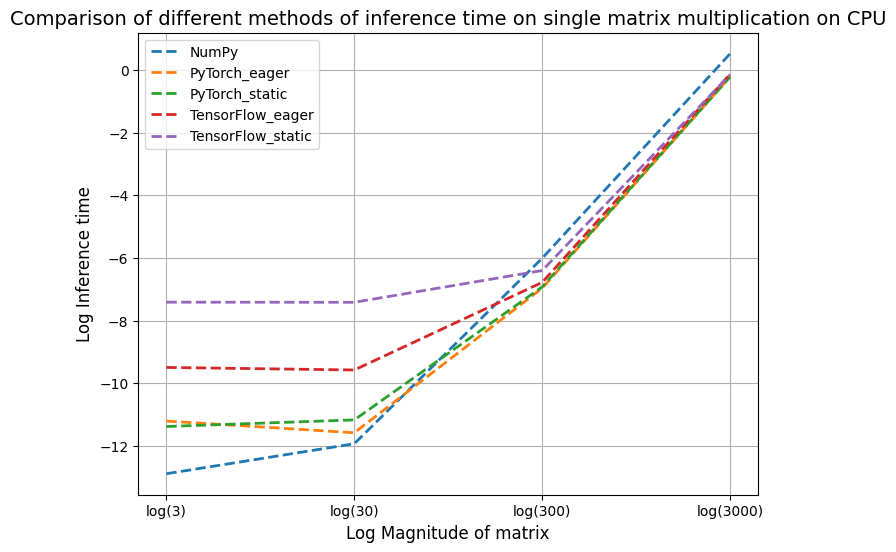

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Create a plot
plt.figure(figsize=(8, 6))  # Set the figure size

x = np.log([3, 30, 300, 3000])
# Plot each array
plt.plot(x, np.log(np_single_y), label="NumPy", linestyle="--", linewidth=2)
plt.plot(x, np.log(pt_e_single_y), label="PyTorch_eager", linestyle="--", linewidth=2)
plt.plot(x, np.log(pt_s_single_y), label="PyTorch_static", linestyle="--", linewidth=2)
plt.plot(x, np.log(tf_e_single_y), label="TensorFlow_eager", linestyle="--", linewidth=2)
plt.plot(x, np.log(tf_s_single_y), label="TensorFlow_static", linestyle="--", linewidth=2)

# Add labels, title, and legend
plt.xlabel("Log Magnitude of matrix", fontsize=12)
plt.ylabel("Log Inference time", fontsize=12)
plt.title("Comparison of different methods of inference time on single matrix multiplication on CPU", fontsize=14)
plt.xticks(x, ["log(3)", "log(30)", "log(300)", "log(3000)"])
plt.legend(loc="upper left")

# Add grid for better visualization
plt.grid(True)

# Show the plot
plt.show()

### Test nested matrix multiplication on CPU

In [8]:
import numpy as np
import time

test_set = [1, 10, 100, 1000]
np_nested_y = []
for d in test_set:

    N = 10
    if d <= 100:
        N = 1000

    print("\nNumpy output with quantity of {}:".format(d))
    t = 0
    for _ in range(N):
        a = np.random.rand(3*d, 3*d)
        b = np.random.rand(3*d, 3*d)
        c = np.random.rand(3*d, 3*d)
        h = np.random.rand(3*d, 3*d)
        e = np.random.rand(3*d, 3*d)

        start = time.time()
        ori_output = a@b@c@h@e
        t += (time.time()-start)
    print("execution time {}s".format(t/N))
    np_nested_y.append(t/N)


Numpy output with quantity of 1:
execution time 1.3036727905273437e-05s

Numpy output with quantity of 10:
execution time 2.898406982421875e-05s

Numpy output with quantity of 100:
execution time 0.010752963781356812s

Numpy output with quantity of 1000:
execution time 6.785777902603149s


In [9]:
import torch
import time

# Define a simple function for matrix multiplication
def pt_matmul_fn(a: torch.Tensor, b: torch.Tensor, c: torch.Tensor, d: torch.Tensor, e: torch.Tensor) -> torch.Tensor:
    return a@b@c@d@e

# Convert the function into a TorchScript static graph using torch.jit.script
@torch.jit.script
def pt_matmul_script(a: torch.Tensor, b: torch.Tensor, c: torch.Tensor, d: torch.Tensor, e: torch.Tensor) -> torch.Tensor:
    return a@b@c@d@e

test_set = [1, 10, 100, 1000]
pt_e_nested_y = []
pt_s_nested_y = []
for d in test_set:

    N = 10
    if d <= 100:
        N = 1000

    print("\nOriginal output with quantity of {}:".format(d))
    t = 0
    for _ in range(N):
        x = [torch.rand(3*d, 3*d)]*5
        start = time.time()
        ori_output = pt_matmul_fn(*x)
        t += (time.time()-start)
    print("execution time {}s".format(t/N))
    pt_e_nested_y.append(t/N)

    print("\nScripted output with quantity of {}:".format(d))
    t = 0
    for _ in range(N):
        x = [torch.rand(3*d, 3*d)]*5
        start = time.time()
        script_output = pt_matmul_script(*x)
        t += (time.time()-start)
    print("execution time {}s".format(t/N))
    pt_s_nested_y.append(t/N)


Original output with quantity of 1:
execution time 4.4799327850341794e-05s

Scripted output with quantity of 1:
execution time 2.3339033126831056e-05s

Original output with quantity of 10:
execution time 3.363513946533203e-05s

Scripted output with quantity of 10:
execution time 3.392577171325683e-05s

Original output with quantity of 100:
execution time 0.004138057470321655s

Scripted output with quantity of 100:
execution time 0.0034011397361755373s

Original output with quantity of 1000:
execution time 3.2093897104263305s


In [10]:
import tensorflow as tf
import time

# Define a simple function for matrix multiplication
def tf_matmul_fn(a, b, c, d, e):
    return a@b@c@d@e

# Convert the function into a static graph using tf.function
@tf.function
def tf_matmul_static_graph(a, b, c, d, e):
    return a@b@c@d@e

test_set = [1, 10, 100, 1000]
tf_e_nested_y = []
tf_s_nested_y = []
for d in test_set:

    N = 10
    if d <= 100:
        N = 1000

    print("\nOriginal output with quantity of {}:".format(d))
    t = 0
    for _ in range(N):
        a = tf.random.uniform((3*d, 3*d))
        b = tf.random.uniform((3*d, 3*d))
        c = tf.random.uniform((3*d, 3*d))
        e = tf.random.uniform((3*d, 3*d))
        f = tf.random.uniform((3*d, 3*d))

        start = time.time()
        ori_output = tf_matmul_fn(a, b, c, e, f)
        t += (time.time()-start)

    print("execution time {}s".format(t/N))
    tf_e_nested_y.append(t/N)

    print("\nScripted output with quantity of {}:".format(d))
    t = 0
    for _ in range(N):
        a = tf.random.uniform((3*d, 3*d))
        b = tf.random.uniform((3*d, 3*d))
        c = tf.random.uniform((3*d, 3*d))
        e = tf.random.uniform((3*d, 3*d))
        f = tf.random.uniform((3*d, 3*d))

        start = time.time()
        script_output = tf_matmul_static_graph(a, b, c, e, f)
        t += (time.time()-start)

    print("execution time {}s".format(t/N))
    tf_s_nested_y.append(t/N)


Original output with quantity of 1:
execution time 0.0002945759296417236s

Scripted output with quantity of 1:
execution time 0.0008033409118652344s

Original output with quantity of 10:
execution time 0.0010984652042388915s

Original output with quantity of 100:
execution time 0.004317537546157837s

Scripted output with quantity of 100:
execution time 0.005309721708297729s

Original output with quantity of 1000:
execution time 3.5755433797836305s

Scripted output with quantity of 1000:
execution time 3.478169560432434s


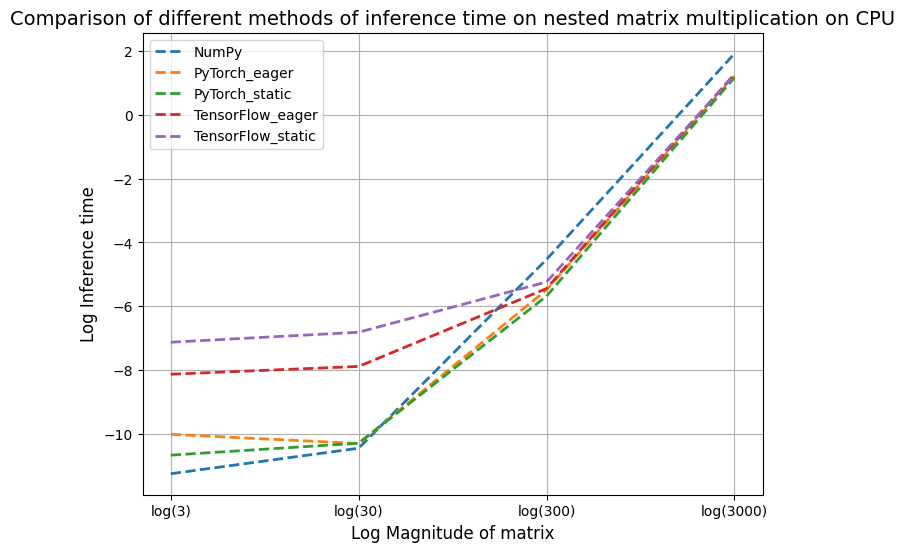

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Create a plot
plt.figure(figsize=(8, 6))  # Set the figure size

x = np.log([3, 30, 300, 3000])
# Plot each array
plt.plot(x, np.log(np_nested_y), label="NumPy", linestyle="--", linewidth=2)
plt.plot(x, np.log(pt_e_nested_y), label="PyTorch_eager", linestyle="--", linewidth=2)
plt.plot(x, np.log(pt_s_nested_y), label="PyTorch_static", linestyle="--", linewidth=2)
plt.plot(x, np.log(tf_e_nested_y), label="TensorFlow_eager", linestyle="--", linewidth=2)
plt.plot(x, np.log(tf_s_nested_y), label="TensorFlow_static", linestyle="--", linewidth=2)

# Add labels, title, and legend
plt.xlabel("Log Magnitude of matrix", fontsize=12)
plt.ylabel("Log Inference time", fontsize=12)
plt.title("Comparison of different methods of inference time on nested matrix multiplication on CPU", fontsize=14)
plt.xticks(x, ["log(3)", "log(30)", "log(300)", "log(3000)"])
plt.legend(loc="upper left")

# Add grid for better visualization
plt.grid(True)

# Show the plot
plt.show()

### Test repeated matrix multiplication on CPU

In [1]:
import numpy as np
import time

test_set = [1, 10, 100, 1000]
np_repeated_y = []
for d in test_set:

    N = 10
    if d <= 100:
        N = 1000

    print("\nNumpy output with quantity of {}:".format(d))
    t = 0
    for _ in range(N):
        x = np.random.rand(3*d, 3*d)
        y = np.random.rand(3*d, 3*d)

        start = time.time()
        ori_output = (x@y)@(x@y)@(x@y)
        t += (time.time()-start)
    print("execution time {}s".format(t/N))
    np_repeated_y.append(t/N)


Numpy output with quantity of 1:
execution time 2.2927045822143554e-05s

Numpy output with quantity of 10:
execution time 5.724096298217774e-05s

Numpy output with quantity of 100:
execution time 0.02604265284538269s

Numpy output with quantity of 1000:
execution time 9.435736107826234s


In [2]:
import torch
import time

# Define a simple function for matrix multiplication
def pt_matmul_fn(x, y):
    return (x@y)@(x@y)@(x@y)

# Convert the function into a TorchScript static graph using torch.jit.script
@torch.jit.script
def pt_matmul_script(x: torch.Tensor, y: torch.Tensor) -> torch.Tensor:
    return (x@y)@(x@y)@(x@y)

test_set = [1, 10, 100, 1000]
pt_e_repeated_y = []
pt_s_repeated_y = []
for d in test_set:

    N = 10
    if d <= 100:
        N = 1000

    print("\nOriginal output with quantity of {}:".format(d))
    t = 0
    for _ in range(N):
        x = torch.rand(3*d, 3*d)
        y = torch.rand(3*d, 3*d)
        start = time.time()
        ori_output = pt_matmul_fn(x, y)
        t += (time.time()-start)
    print("execution time {}s".format(t/N))
    pt_e_repeated_y.append(t/N)

    print("\nScripted output with quantity of {}:".format(d))
    t = 0
    for _ in range(N):
        x = torch.rand(3*d, 3*d)
        y = torch.rand(3*d, 3*d)
        start = time.time()
        script_output = pt_matmul_script(x, y)
        t += (time.time()-start)
    print("execution time {}s".format(t/N))
    pt_s_repeated_y.append(t/N)


Original output with quantity of 1:
execution time 9.322428703308106e-05s

Scripted output with quantity of 1:
execution time 2.0395755767822267e-05s

Original output with quantity of 10:
execution time 2.7333498001098632e-05s

Scripted output with quantity of 10:
execution time 1.67393684387207e-05s

Original output with quantity of 100:
execution time 0.004946703433990478s

Scripted output with quantity of 100:
execution time 0.003982741355895996s

Original output with quantity of 1000:
execution time 4.440198254585266s

Scripted output with quantity of 1000:
execution time 2.840745949745178s


In [3]:
import tensorflow as tf
import time

# Define a simple function for matrix multiplication
def tf_matmul_fn(x, y):
    return (x@y)@(x@y)@(x@y)

# Convert the function into a static graph using tf.function
@tf.function
def tf_matmul_static_graph(x, y):
    return (x@y)@(x@y)@(x@y)

test_set = [1, 10, 100, 1000]
tf_e_repeated_y = []
tf_s_repeated_y = []
for d in test_set:

    N = 10
    if d <= 100:
        N = 1000

    print("\nOriginal output with quantity of {}:".format(d))
    t = 0
    for _ in range(N):
        x = tf.random.uniform((3*d, 3*d))
        y = tf.random.uniform((3*d, 3*d))

        start = time.time()
        ori_output = tf_matmul_fn(x, y)
        t += (time.time()-start)
    print("execution time {}s".format(t/N))
    tf_e_repeated_y.append(t/N)

    print("\nScripted output with quantity of {}:".format(d))
    t = 0
    for _ in range(N):
        x = tf.random.uniform((3*d, 3*d))
        y = tf.random.uniform((3*d, 3*d))

        start = time.time()
        script_output = tf_matmul_static_graph(x, y)
        t += (time.time()-start)
    print("execution time {}s".format(t/N))
    tf_s_repeated_y.append(t/N)


Original output with quantity of 1:
execution time 0.00042604470252990723s

Scripted output with quantity of 1:
execution time 0.0006991856098175049s

Original output with quantity of 10:
execution time 0.00038837361335754397s

Scripted output with quantity of 10:
execution time 0.0006709592342376709s

Original output with quantity of 100:
execution time 0.0073253180980682375s

Scripted output with quantity of 100:
execution time 0.003915771484375s

Original output with quantity of 1000:
execution time 5.339347457885742s

Scripted output with quantity of 1000:
execution time 3.0156049728393555s


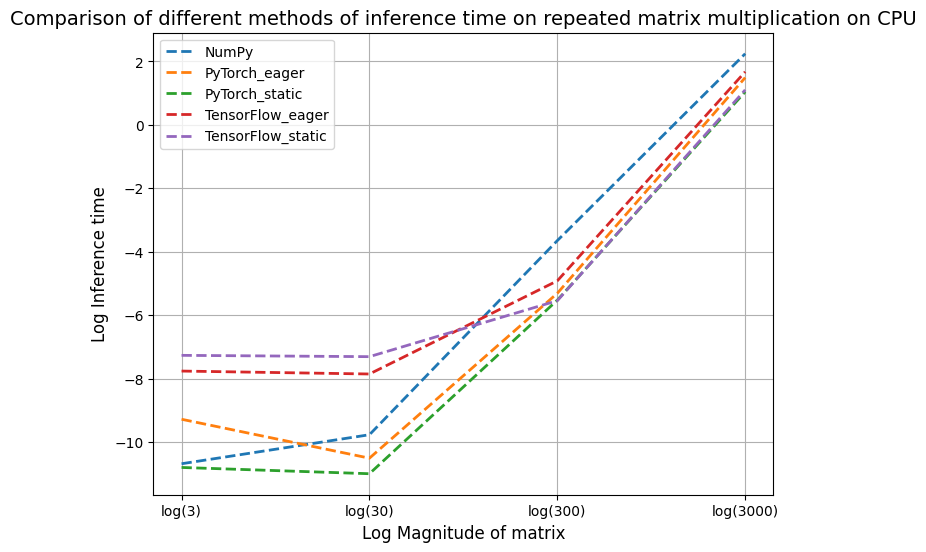

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Create a plot
plt.figure(figsize=(8, 6))  # Set the figure size

x = np.log([3, 30, 300, 3000])
# Plot each array
plt.plot(x, np.log(np_repeated_y), label="NumPy", linestyle="--", linewidth=2)
plt.plot(x, np.log(pt_e_repeated_y), label="PyTorch_eager", linestyle="--", linewidth=2)
plt.plot(x, np.log(pt_s_repeated_y), label="PyTorch_static", linestyle="--", linewidth=2)
plt.plot(x, np.log(tf_e_repeated_y), label="TensorFlow_eager", linestyle="--", linewidth=2)
plt.plot(x, np.log(tf_s_repeated_y), label="TensorFlow_static", linestyle="--", linewidth=2)

# Add labels, title, and legend
plt.xlabel("Log Magnitude of matrix", fontsize=12)
plt.ylabel("Log Inference time", fontsize=12)
plt.title("Comparison of different methods of inference time on repeated matrix multiplication on CPU", fontsize=14)
plt.xticks(x, ["log(3)", "log(30)", "log(300)", "log(3000)"])
plt.legend(loc="upper left")

# Add grid for better visualization
plt.grid(True)

# Show the plot
plt.show()

## Below is for GPU

### Test single matrix multiplication on GPU

In [13]:
import torch
import time
import torch.nn as nn

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class torch_matmul(nn.Module):
    def __init__(self):
        super(torch_matmul, self).__init__()

    def forward(self, x, y):
        return torch.matmul(x, y)

test_set = [1, 10, 100, 1000]
pt_e_single_y_gpu = []
pt_s_single_y_gpu = []
for d in test_set:

    N = 100
    if d <= 100:
        N = 10000

    model = torch_matmul()
    model.to(device)
    x = torch.rand(3*d, 3*d).to(device)
    y = torch.rand(3*d, 3*d).to(device)
    traced_model = torch.jit.trace(model, (x, y))

    print("\nOriginal output with quantity of {}:".format(d))
    t = 0
    for _ in range(N):
        x = torch.rand(3*d, 3*d).to(device)
        y = torch.rand(3*d, 3*d).to(device)
        start = time.time()
        ori_output = model(x, y)
        t += (time.time()-start)
    print("execution time {}s".format(t/N))
    pt_e_single_y_gpu.append(t/N)

    print("\nScripted output with quantity of {}:".format(d))
    t = 0
    for _ in range(N):
        x = torch.rand(3*d, 3*d).to(device)
        y = torch.rand(3*d, 3*d).to(device)
        start = time.time()
        script_output = traced_model(x, y)
        t += (time.time()-start)
    print("execution time {}s".format(t/N))
    pt_s_single_y_gpu.append(t/N)


Original output with quantity of 1:
execution time 2.221193313598633e-05s

Scripted output with quantity of 1:
execution time 3.751194477081299e-05s

Original output with quantity of 10:
execution time 2.3784184455871582e-05s

Scripted output with quantity of 10:
execution time 4.1658616065979006e-05s

Original output with quantity of 100:
execution time 4.8042440414428713e-05s

Scripted output with quantity of 100:
execution time 8.988072872161865e-05s

Original output with quantity of 1000:
execution time 0.0002576184272766113s

Scripted output with quantity of 1000:
execution time 0.0002487802505493164s


In [14]:
import tensorflow.compat.v1 as tf
import numpy as np
tf.disable_v2_behavior()

test_set = [1, 10, 100, 1000]
tf_s_single_y_gpu = []
for d in test_set:

    N = 100
    if d <= 100:
        N = 10000

    tf.reset_default_graph()

    with tf.device('/gpu:0'):
        # Define placeholders for input and output
        x = tf.placeholder(tf.float32, shape=[3*d, 3*d], name='x')  # Input features (batch_size x 10)
        y = tf.placeholder(tf.float32, shape=[3*d, 3*d], name='y')
        output = tf.matmul(x, y, name='output')

    with tf.Session(config=tf.ConfigProto(log_device_placement=False)) as sess:

        print("\nScripted output with quantity of {}:".format(d))
        t = 0
        for i in range(N):
            x_test = np.random.rand(3*d, 3*d)
            y_test = np.random.rand(3*d, 3*d)
            start = time.time()
            prediction = sess.run(output, feed_dict={x: x_test, y: y_test})
            t += (time.time()-start)
        print("execution time {}s".format(t/N))
        tf_s_single_y_gpu.append(t/N)


Scripted output with quantity of 1:
execution time 0.0005921461343765258s

Scripted output with quantity of 10:
execution time 0.0005965375423431396s

Scripted output with quantity of 100:
execution time 0.0011043516159057617s

Scripted output with quantity of 1000:
execution time 0.12597113609313965s


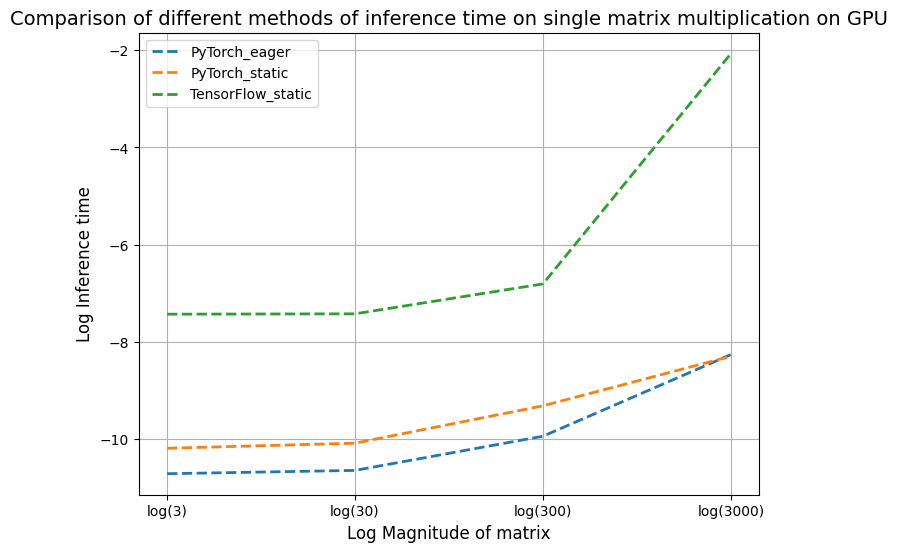

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Create a plot
plt.figure(figsize=(8, 6))  # Set the figure size

x = np.log([3, 30, 300, 3000])
# Plot each array
plt.plot(x, np.log(pt_e_single_y_gpu), label="PyTorch_eager", linestyle="--", linewidth=2)
plt.plot(x, np.log(pt_s_single_y_gpu), label="PyTorch_static", linestyle="--", linewidth=2)
plt.plot(x, np.log(tf_s_single_y_gpu), label="TensorFlow_static", linestyle="--", linewidth=2)

# Add labels, title, and legend
plt.xlabel("Log Magnitude of matrix", fontsize=12)
plt.ylabel("Log Inference time", fontsize=12)
plt.title("Comparison of different methods of inference time on single matrix multiplication on GPU", fontsize=14)
plt.xticks(x, ["log(3)", "log(30)", "log(300)", "log(3000)"])
plt.legend(loc="upper left")

# Add grid for better visualization
plt.grid(True)

# Show the plot
plt.show()

### Test repeated matrix multiplication on GPU

In [8]:
import torch
import time
import torch.nn as nn

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class torch_matmul(nn.Module):
    def __init__(self):
        super(torch_matmul, self).__init__()

    def forward(self, x, y):
        return (x@y)@(x@y)@(x@y)

test_set = [1, 10, 100, 1000]
pt_e_repeated_y_gpu = []
pt_s_repeated_y_gpu = []
for d in test_set:

    N = 10
    if d <= 100:
        N = 1000

    model = torch_matmul()
    model.to(device)
    x = torch.rand(3*d, 3*d).to(device)
    y = torch.rand(3*d, 3*d).to(device)
    traced_model = torch.jit.trace(model, (x, y))

    print("\nOriginal output with quantity of {}:".format(d))
    t = 0
    for _ in range(N):
        x = torch.rand(3*d, 3*d).to(device)
        y = torch.rand(3*d, 3*d).to(device)
        start = time.time()
        ori_output = model(x, y)
        t += (time.time()-start)
    print("execution time {}s".format(t/N))
    pt_e_repeated_y_gpu.append(t/N)

    print("\nScripted output with quantity of {}:".format(d))
    t = 0
    for _ in range(N):
        x = torch.rand(3*d, 3*d).to(device)
        y = torch.rand(3*d, 3*d).to(device)
        start = time.time()
        script_output = traced_model(x, y)
        t += (time.time()-start)
    print("execution time {}s".format(t/N))
    pt_s_repeated_y_gpu.append(t/N)


Original output with quantity of 1:
execution time 6.721830368041993e-05s

Scripted output with quantity of 1:
execution time 6.275343894958496e-05s

Original output with quantity of 10:
execution time 7.407855987548829e-05s

Scripted output with quantity of 10:
execution time 7.673859596252442e-05s

Original output with quantity of 100:
execution time 0.0001016383171081543s

Scripted output with quantity of 100:
execution time 9.371399879455566e-05s

Original output with quantity of 1000:
execution time 0.00030078887939453123s

Scripted output with quantity of 1000:
execution time 0.0003665924072265625s


In [11]:
import tensorflow.compat.v1 as tf
import numpy as np
import time
tf.disable_v2_behavior()

test_set = [1, 10, 100, 1000]
tf_s_repeated_y_gpu = []
for d in test_set:

    N = 10
    if d <= 100:
        N = 1000

    tf.reset_default_graph()

    with tf.device('/gpu:0'):
        # Define placeholders for input and output
        x = tf.placeholder(tf.float32, shape=[3*d, 3*d], name='x')  # Input features (batch_size x 10)
        y = tf.placeholder(tf.float32, shape=[3*d, 3*d], name='y')
        output = tf.matmul(tf.matmul(tf.matmul(x, y), tf.matmul(x, y)), tf.matmul(x, y), name='output')

    with tf.Session(config=tf.ConfigProto(log_device_placement=False)) as sess:

        print("\nScripted output with quantity of {}:".format(d))
        t = 0
        for i in range(N):
            x_test = np.random.rand(3*d, 3*d)
            y_test = np.random.rand(3*d, 3*d)
            start = time.time()
            prediction = sess.run(output, feed_dict={x: x_test, y: y_test})
            t += (time.time()-start)
        print("execution time {}s".format(t/N))
        tf_s_repeated_y_gpu.append(t/N)


Scripted output with quantity of 1:
execution time 0.0010310633182525634s

Scripted output with quantity of 10:
execution time 0.0007784004211425781s

Scripted output with quantity of 100:
execution time 0.0011286277770996094s

Scripted output with quantity of 1000:
execution time 0.16274750232696533s


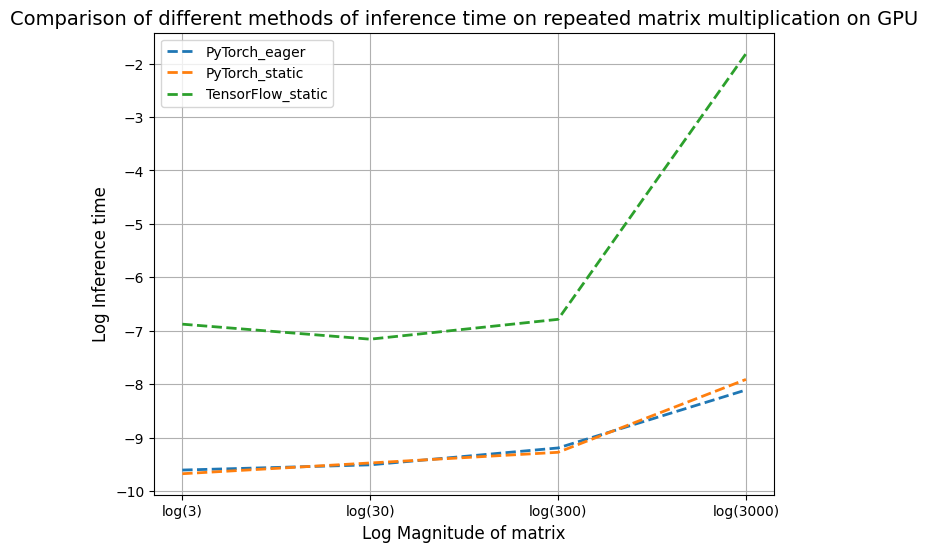

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Create a plot
plt.figure(figsize=(8, 6))  # Set the figure size

x = np.log([3, 30, 300, 3000])
# Plot each array
plt.plot(x, np.log(pt_e_single_y_gpu), label="PyTorch_eager", linestyle="--", linewidth=2)
plt.plot(x, np.log(pt_s_single_y_gpu), label="PyTorch_static", linestyle="--", linewidth=2)
plt.plot(x, np.log(tf_s_single_y_gpu), label="TensorFlow_static", linestyle="--", linewidth=2)

# Add labels, title, and legend
plt.xlabel("Log Magnitude of matrix", fontsize=12)
plt.ylabel("Log Inference time", fontsize=12)
plt.title("Comparison of different methods of inference time on repeated matrix multiplication on GPU", fontsize=14)
plt.xticks(x, ["log(3)", "log(30)", "log(300)", "log(3000)"])
plt.legend(loc="upper left")

# Add grid for better visualization
plt.grid(True)

# Show the plot
plt.show()